In [ ]:
!pip install sunpy
!pip install drms
!pip install zeep
!pip install glymur
!pip install heliopy
!pip install sunpy
!pip install cdflib
!pip install spiceypy
!pip install ffmpeg
!pip install astroquery
#!pip install openjpeg

     |████████████████████████████████| 6.9MB 3.0MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 1.2MB 38.8MB/s 
     |████████████████████████████████| 266kB 38.7MB/s 
     |████████████████████████████████| 153kB 39.6MB/s 
  Created wheel for parfive: filename=parfive-1.1rc2-cp36-none-any.whl size=16668 sha256=b39b62e563db546e377f08ef6728756add5d9b55530742d8a057ac1756efa846
  Stored in directory: /root/.cache/pip/wheels/9d/8a/1d/b5990ddca328c390292377d1f611e33a14a91bce30bd093e8f
Successfully built parfive
  Created wheel for idna-ssl: filename=idna_ssl-1.1.0-cp36-none-any.whl size=3161 sha256=e978eed0d01abe51b29262381ffcd92fe3f50f7e3a31c02fa7955ad0af777647
  Stored in directory: /root/.cache/pip/wheels/d3/00/b3/32d613e19e08a739751dd6bf998cfed277728f8b2127ad4eb7
Successfully built idna-ssl
     |████████████████████████████████| 71kB 2.3MB/s 
  Created wheel for 

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

import sunpy
import sunpy.data.sample
import sunpy.map
from sunpy.net.helioviewer import HelioviewerClient
from sunpy.map import Map
from sunpy.coordinates import frames

import astropy
import astropy.units as u

import numpy as np
import matplotlib.dates as mdates
import heliopy
import astropy
import datetime
from datetime import timedelta
import astropy.constants as const
from sunpy.time import parse_time
import heliopy.spice as spice
import heliopy.data.spice as spicedata
import seaborn as sns
import glob
import os
import astroquery
import pandas as pd

In [ ]:
def cart2sphere(x,y,z):
    r = np.sqrt(x**2+ y**2 + z**2)           
    theta = np.arctan(z/np.sqrt(x**2+ y**2))
    phi = np.arctan2(y,x)                    
    return (r, theta, phi)

frame='HEEQ'
starttime = datetime.datetime(2018, 8,13)
endtime = datetime.datetime(2025, 8, 31)
pspt_time = []
res_in_days=1/48.
while starttime < endtime:
    pspt_time.append(starttime)
    starttime += timedelta(days=res_in_days)
pspt_time_num=parse_time(pspt_time).plot_date
starttime =datetime.datetime(2018, 8,13)

spice.furnish(spicedata.get_kernel('psp_pred'))
pspt=spice.Trajectory('SPP')
pspt.generate_positions(pspt_time,'Sun',frame)
psp_speed=pspt.speed.value
pspt.change_units(astropy.units.AU)  
[psp_r, psp_lat, psp_lon]=cart2sphere(pspt.x,pspt.y,pspt.z)
print('PSP pos')
print()

PSP pos



In [ ]:
lon=np.degrees(psp_lon.value)
print(lon)
lat=np.degrees(psp_lat.value)
print(lat)
r=psp_r.value
print(r)
ptime=pspt_time

[-0.26736573 -0.2756879  -0.28400928 ...  7.04771653  7.05028505
  7.05288513]
[6.47275143 6.47224984 6.47174814 ... 3.85815706 3.85817297 3.8581883 ]
[1.01317831 1.01317197 1.01316555 ... 0.51436421 0.5140078  0.51365099]


In [ ]:
hv = HelioviewerClient()
hv.get_data_sources()

{'Hinode': {'XRT': {'Al_med': {'Al_thick': {'end': '2017-09-10 16:15:37',
     'layeringOrder': 1,
     'nickname': 'XRT Al_med/Al_thick',
     'sourceId': 39,
     'start': '2008-09-04 07:33:28',
     'uiLabels': [{'label': 'Observatory', 'name': 'Hinode'},
      {'label': 'Instrument', 'name': 'XRT'},
      {'label': 'Filter Wheel 1', 'name': 'Al_med'},
      {'label': 'Filter Wheel 2', 'name': 'Al_thick'}]},
    'Any': {'end': '2020-08-31 14:38:08',
     'layeringOrder': 1,
     'nickname': 'XRT Al_med/Any',
     'sourceId': 10008,
     'start': '1991-09-11 00:00:00',
     'uiLabels': [{'label': 'Observatory', 'name': 'Hinode'},
      {'label': 'Instrument', 'name': 'XRT'},
      {'label': 'Filter Wheel 1', 'name': 'Al_med'},
      {'label': 'Filter Wheel 2', 'name': 'Any'}]},
    'Be_thick': {'end': '2009-11-13 09:01:14',
     'layeringOrder': 1,
     'nickname': 'XRT Al_med/Be_thick',
     'sourceId': 40,
     'start': '2009-11-13 09:01:14',
     'uiLabels': [{'label': 'Observator

In [ ]:
start = '2010/05/23 16:00:00'
date = datetime.datetime.strptime(start, '%Y/%m/%d %H:%M:%S')
datelist = [date + i*datetime.timedelta(hours=0.5) for i in range(31)]
datelist_str = [datetime.datetime.strftime(datelist[i], '%Y/%m/%d %H:%M:%S') for i in range(len(datelist))]

In [ ]:
#https://docs.sunpy.org/en/latest/guide/acquiring_data/helioviewer.html



############################### LASCO
#t1=['2010/05/23 17:00:00', '2010/05/23 18:00:00', '2010/05/23 19:00:00', '2010/05/23 20:00:00', '2010/05/23 21:00:00', '2010/05/23 22:00:00', '2010/05/23 23:00:00', '2010/05/24 00:00:00', '2010/05/24 01:00:00', '2010/05/24 02:00:00', '2010/05/24 03:00:00', '2010/05/24 04:00:00', '2010/05/24 05:00:00', '2010/05/24 06:00:00', '2010/05/24 07:00:00']
t1 = datelist_str
#file = hv.download_jp2('2020/08/01', observatory="SDO", instrument="AIA",    measurement="304") 
#file = hv.download_jp2('2012/07/23 04:00:00', observatory="SOHO", instrument="LASCO", detector='C3'  ,  measurement="white-light") 
file = [hv.download_jp2(t1[i], observatory="SOHO", instrument="LASCO", detector='C3',  measurement="white-light") for i in range(len(t1))] 

las = Map(file)  

#rotate the map
lasrot = [las[i].rotate(angle=0 * u.deg) for i in range(len(t1))]

#fig = plt.figure(1, dpi=200)
#ax = plt.subplot(111, projection=lasrot)

#lasrot.plot()
#lasrot.draw_limb()
#las.draw_grid()
#plt.colorbar()




############################### COR2

file = [hv.download_jp2(t1[i], observatory="STEREO_A", instrument="SECCHI", detector='COR2'  ,  measurement="white-light") for i in range(len(t1))] 

cor2 = Map(file)  

#rotate the map
cor2rot = [cor2[i].rotate(angle=0 * u.deg) for i in range(len(t1))]

#fig = plt.figure(2, dpi=200)
#ax = plt.subplot(111, projection=cor2rot)

#cor2rot.plot()
#cor2rot.draw_limb()
#plt.colorbar()





################################### HMI
#hv = HelioviewerClient()
#filepath = hv.download_jp2(t1, observatory='SDO', instrument='HMI', measurement='magnetogram')
#hmi = Map(filepath)

#fig = plt.figure(3,dpi=200)
#ax = plt.subplot(111,projection=hmi)

#hmi.plot()
#plt.grid(None)

#hmi.draw_limb()
#hmi.draw_grid()
#plt.colorbar()


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]
2010_05_23__15_42_06_885__SOHO_LASCO_C3_white-light.jp2:   0%|          | 0.00/482k [00:00<?, ?B/s]
2010_05_23__15_42_06_885__SOHO_LASCO_C3_white-light.jp2:   0%|          | 100/482k [00:00<20:10, 398B/s]
2010_05_23__15_42_06_885__SOHO_LASCO_C3_white-light.jp2:  44%|████▍     | 213k/482k [00:00<07:52, 568B/s]
Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]
2010_05_23__16_18_05_833__SOHO_LASCO_C3_white-light.jp2:   0%|          | 0.00/496k [00:00<?, ?B/s]
2010_05_23__16_18_05_833__SOHO_LASCO_C3_white-light.jp2:   0%|          | 100/496k [00:00<20:37, 401B/s]
2010_05_23__16_18_05_833__SOHO_LASCO_C3_white-light.jp2:  36%|███▌      | 179k/496k [00:00<09:12, 572B/s]
Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]
2010_05_23__16_42_05_444__SOHO_LASCO_C3_white-light.jp2:   0%|          | 0.00/480k [00:00<?, ?B/s]
2010_05_23__16_42_05_444__SOHO_LASCO_C3_white-light.jp2:   0%|          | 100/480k [00:00<19:58, 401B/s]

In [ ]:
#HEEQ to Heliocentric Cartesian

#obs_lon = psp_lon
#obs_lat = psp_lat
#radius = psp_r

#x = pspt.y
#y = pspt.z*np.cos(obs_lat) - pspt.x*np.sin(obs_lat)
#z = pspt.z*np.sin(obs_lat) + pspt.x*np.cos(obs_lat)

In [ ]:
#Heliocentric Cartesian to Helioprojective Cartesian

#d = np.sqrt(x**2 + y**2+(psp_r-z)**2)
#theta_x = np.arctan2(x, psp_r-z)
#theta_y = np.arcsin(y/d)

In [ ]:
#Helioprojective Cartesian to Helioprojective Radial

#theta_rho = np.arctan2(np.cos(theta_y)*np.cos(theta_x), np.sqrt(np.cos(theta_y)**2*np.sin(theta_x)**2+np.sin(theta_y)**2))
#psi = np.arctan2(np.sin(theta_y), -np.cos(theta_y)*np.sin(theta_x))

In [ ]:
# Hier mounte ich meinen eigenen Google Drive um auf die dort gespeicherten .sav files zugreifen zu können

# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive/', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [ ]:
os.chdir('/content/drive/My Drive/COR2/')
#rotate the map
#cor2rot = cor2.rotate(angle=0 * u.deg)
from astropy.coordinates import SkyCoord
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.colors as colors

fig = plt.figure(2, dpi=400)


for i in range(len(t1)):
  ax = plt.subplot(111, projection=cor2[i])

  cor2[i].plot_settings['cmap'] = cm.get_cmap('viridis')
  cor2[i].plot_settings['norm'] = colors.LogNorm(80, cor2[i].max())

  cor2[i].plot()

  c = SkyCoord(psp_lon[2*57930:2*57930+len(t1)], psp_lat[2*57930:2*57930+len(t1)], psp_r[2*57930:2*57930+len(t1)], frame='heliographic_stonyhurst')
  ax.plot_coord(c, linestyle='solid', linewidth=2, color='crimson')
  ax.plot_coord(c[i], '8', markersize=5, mec='crimson', mfc='white')
  #cor2rot.draw_limb()
  #las.draw_grid()
  plt.colorbar()
  plt.savefig('cor2_' + str(i+1) + '.png')
  plt.close()
  #files.download('/cor2/cor2_' + str(i) + '.png')

keyword looks very much like CROTAn but isn't. [astropy.wcs.wcs]
keyword looks very much like CROTAn but isn't. [astropy.wcs.wcs]
keyword looks very much like CROTAn but isn't. [astropy.wcs.wcs]
keyword looks very much like CROTAn but isn't. [astropy.wcs.wcs]
keyword looks very much like CROTAn but isn't. [astropy.wcs.wcs]
keyword looks very much like CROTAn but isn't. [astropy.wcs.wcs]
keyword looks very much like CROTAn but isn't. [astropy.wcs.wcs]
keyword looks very much like CROTAn but isn't. [astropy.wcs.wcs]
keyword looks very much like CROTAn but isn't. [astropy.wcs.wcs]
keyword looks very much like CROTAn but isn't. [astropy.wcs.wcs]
keyword looks very much like CROTAn but isn't. [astropy.wcs.wcs]
keyword looks very much like CROTAn but isn't. [astropy.wcs.wcs]
keyword looks very much like CROTAn but isn't. [astropy.wcs.wcs]
keyword looks very much like CROTAn but isn't. [astropy.wcs.wcs]
keyword looks very much like CROTAn but isn't. [astropy.wcs.wcs]
keyword looks very much l

keyword looks very much like CROTAn but isn't. [astropy.wcs.wcs]
keyword looks very much like CROTAn but isn't.
Changed DATE-OBS from '2010/05/23T15:42:06.885' to '2010-05-23T15:42:06.885''. [astropy.wcs.wcs]
Changed DATE-OBS from '2010/05/23T15:42:06.885' to '2010-05-23T15:42:06.885''.
 [sunpy.map.mapbase]

keyword looks very much like CROTAn but isn't. [astropy.wcs.wcs]
keyword looks very much like CROTAn but isn't.
Changed DATE-OBS from '2010/05/23T15:42:06.885' to '2010-05-23T15:42:06.885''. [astropy.wcs.wcs]
Changed DATE-OBS from '2010/05/23T15:42:06.885' to '2010-05-23T15:42:06.885''.
 [sunpy.map.mapbase]

keyword looks very much like CROTAn but isn't. [astropy.wcs.wcs]
keyword looks very much like CROTAn but isn't.
Changed DATE-OBS from '2010/05/23T16:18:05.833' to '2010-05-23T16:18:05.833''. [astropy.wcs.wcs]
Changed DATE-OBS from '2010/05/23T16:18:05.833' to '2010-05-23T16:18:05.833''.
 [sunpy.map.mapbase]

keyword looks very much like CROTAn but isn't. [astropy.wcs.wcs]
keywo

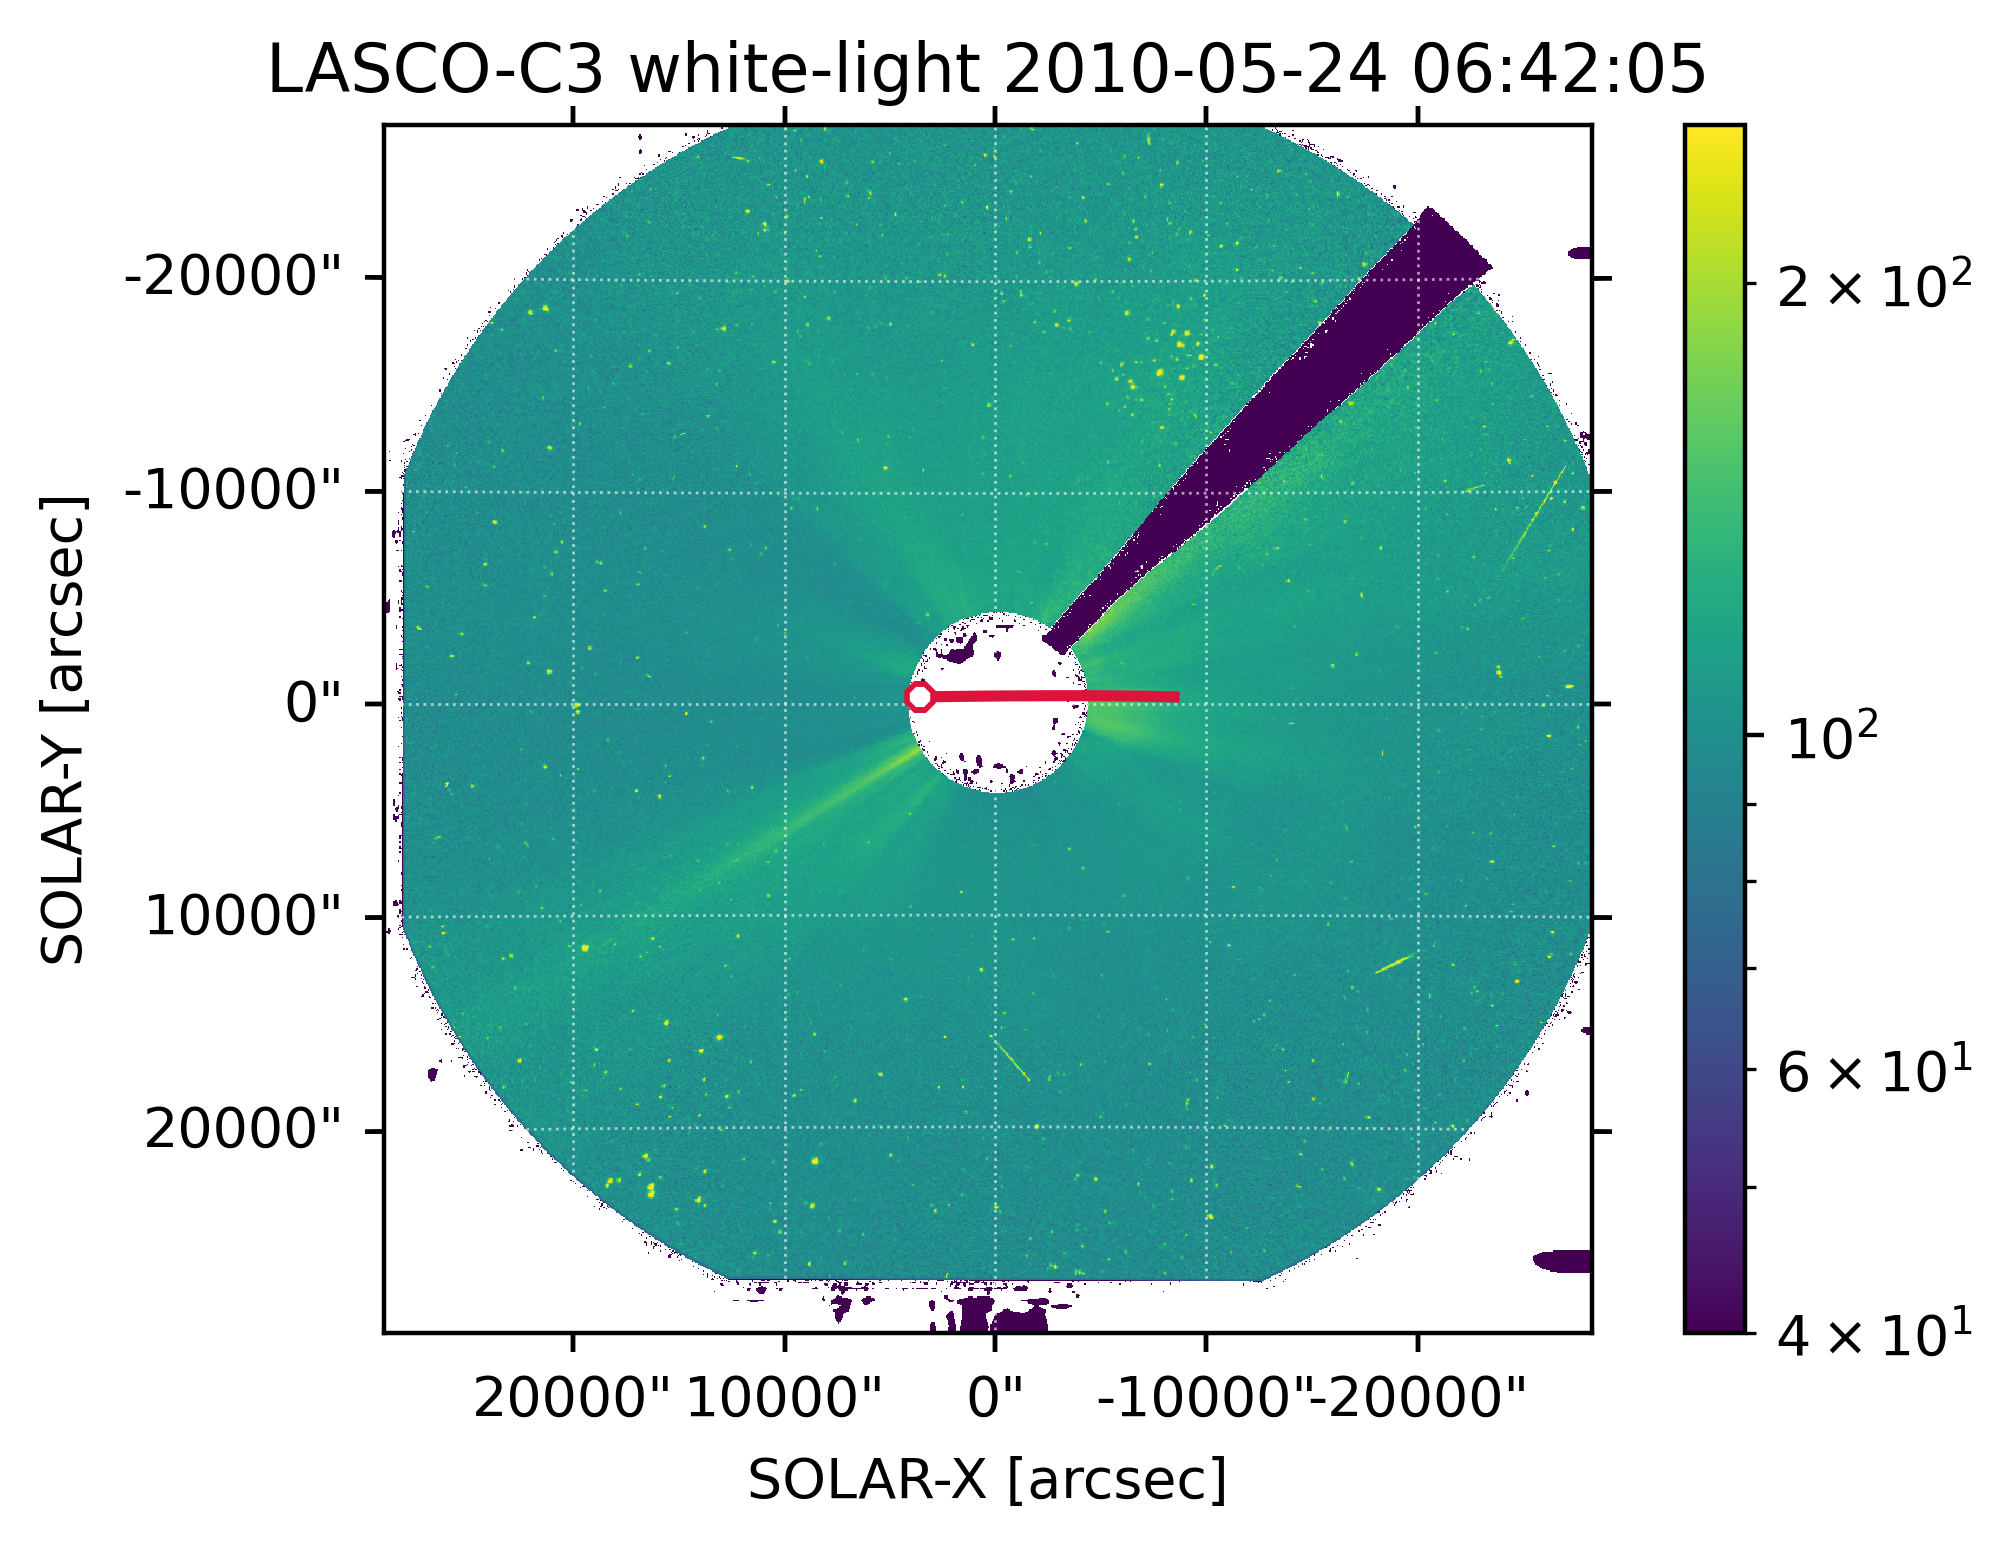

In [ ]:
os.chdir('/content/drive/My Drive/C3/')
#rotate the map
#cor2rot = cor2.rotate(angle=0 * u.deg)
from astropy.coordinates import SkyCoord
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.colors as colors

fig = plt.figure(2, dpi=400)

k = 0

for i in range(len(t1)):

  if i in [7, 14, 19]:
    continue
  
  else:
    ax = plt.subplot(111, projection=las[i])

    las[i].plot_settings['cmap'] = cm.get_cmap('viridis')
    las[i].plot_settings['norm'] = colors.LogNorm(40, las[i].max())

    las[i].plot()

    c = SkyCoord(psp_lon[2*57930:2*57930+len(t1)], psp_lat[2*57930:2*57930+len(t1)], psp_r[2*57930:2*57930+len(t1)], frame='heliographic_stonyhurst')
    ax.plot_coord(c, linestyle='solid', linewidth=2, color='crimson')
    ax.plot_coord(c[i], '8', markersize=5, mec='crimson', mfc='white')
    #cor2rot.draw_limb()
    #las.draw_grid()
    plt.colorbar()
    plt.savefig('c3_' + str(k+1) + '.png')
    k = k + 1

keyword looks very much like CROTAn but isn't. [astropy.wcs.wcs]
keyword looks very much like CROTAn but isn't.
Changed DATE-OBS from '2010/05/23T15:42:06.885' to '2010-05-23T15:42:06.885''. [astropy.wcs.wcs]
Changed DATE-OBS from '2010/05/23T15:42:06.885' to '2010-05-23T15:42:06.885''.
 [sunpy.map.mapbase]

keyword looks very much like CROTAn but isn't. [astropy.wcs.wcs]
keyword looks very much like CROTAn but isn't.
Changed DATE-OBS from '2010/05/23T15:42:06.885' to '2010-05-23T15:42:06.885''. [astropy.wcs.wcs]
Changed DATE-OBS from '2010/05/23T15:42:06.885' to '2010-05-23T15:42:06.885''.
 [sunpy.map.mapbase]



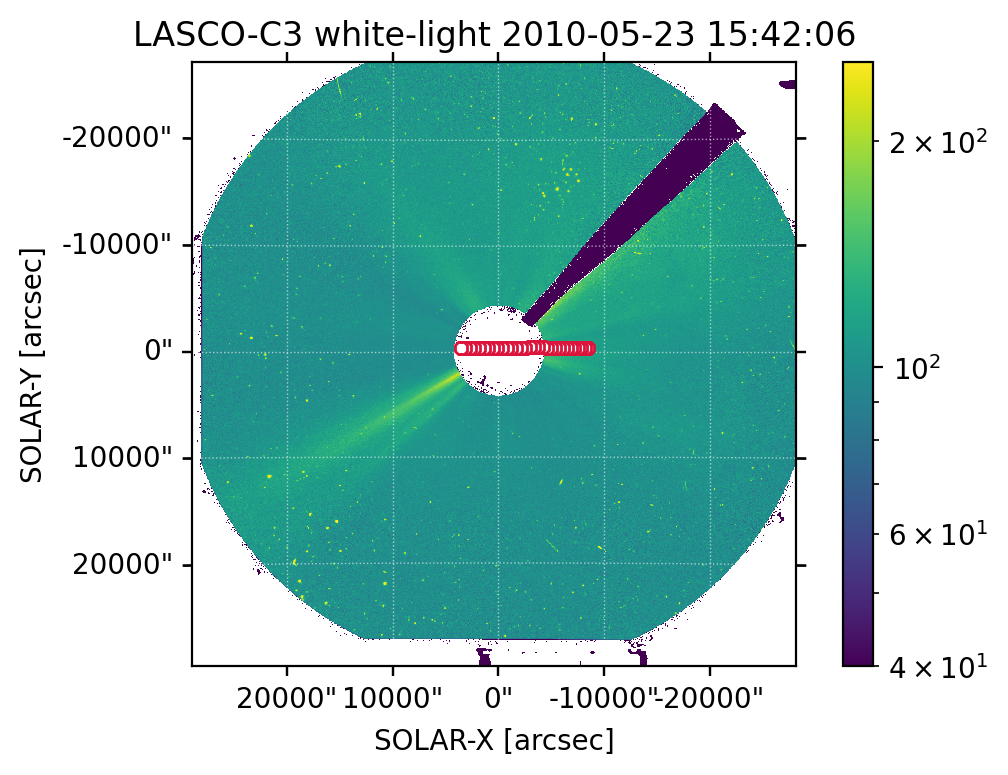

In [ ]:
os.chdir('/content/drive/My Drive/C3/')
#rotate the map
#cor2rot = cor2.rotate(angle=0 * u.deg)
from astropy.coordinates import SkyCoord
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.colors as colors

i = 0
fig = plt.figure(2, dpi=200)


ax = plt.subplot(111, projection=las[i])

las[i].plot_settings['cmap'] = cm.get_cmap('viridis')
las[i].plot_settings['norm'] = colors.LogNorm(40, las[i].max())

las[i].plot()

c = SkyCoord(psp_lon[2*57930:2*57930+len(t1)], psp_lat[2*57930:2*57930+len(t1)], psp_r[2*57930:2*57930+len(t1)], frame=frames.HeliographicStonyhurst)


ax.plot_coord(c, linestyle='solid', linewidth=2, color='crimson')
ax.plot_coord(c[0:len(t1)], '8', markersize=5, mec='crimson', mfc='white')
#cor2rot.draw_limb()
#las.draw_grid()
plt.colorbar()

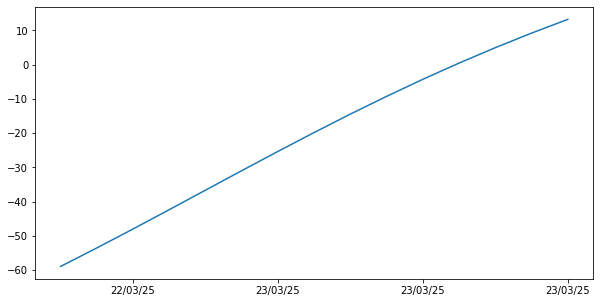

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(pspt_time_num[57930:57945], psp_lon[57930:57945].to(u.deg))
plt.gca().xaxis.set_major_locator(mdates.HourLocator(byhour=range(0, 24, 4)))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%y'))
ax.xaxis_date()